<a href="https://colab.research.google.com/github/Amansingh1202/Data-Science_Practice/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os ,shutil

In [2]:
original_dataset_dir = 'drive/My Drive/pets'
base_dir = 'drive/My Drive/Data'
os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [5]:
fnames = ['cat ({}).jpg'.format(i) for i in range(1,26)]
fnames1 = ['cat ({}).jpeg'.format(i) for i in range(1,26)]
for fname in fnames:
  src = os.path.join(os.path.join(original_dataset_dir,'cats'),fname)
  dest = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dest)
for fname in fnames1:
  src1 = os.path.join(os.path.join(original_dataset_dir,'cats'),fname)
  dest1 = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src1,dest1)

In [6]:
fnames2 = ['cat ({}).jpg'.format(i) for i in range(26,37)]
fnames3 = ['cat ({}).jpeg'.format(i) for i in range(26,33)]
for fname in fnames2:
  src = os.path.join(os.path.join(original_dataset_dir,'cats'),fname)
  dest = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dest)
for fname in fnames3:
  src1 = os.path.join(os.path.join(original_dataset_dir,'cats'),fname)
  dest1 = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src1,dest1)

In [7]:
fnames4 = ['cat ({}).jpeg'.format(i) for i in range(33,53)]
for fname in fnames4:
  src = os.path.join(os.path.join(original_dataset_dir,'cats'),fname)
  dest = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dest)

In [8]:
fnames6 = ['dog ({}).jpeg'.format(i) for i in range(1,41) if i!=3]
for fname in fnames6:
  src1 = os.path.join(os.path.join(original_dataset_dir,'dogs'),fname)
  dest1 = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src1,dest1)

In [9]:
fnames7 = ['dog ({}).jpeg'.format(i) for i in range(41,62)]
for fname in fnames7:
  src = os.path.join(os.path.join(original_dataset_dir,'dogs'),fname)
  dest = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dest)

In [10]:

fnames8 = ['dog ({}).jpeg'.format(i) for i in range(62,84)]
for fname in fnames8:
  src = os.path.join(os.path.join(original_dataset_dir,'dogs'),fname)
  dest = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dest)

In [11]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [13]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
)
validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
)

Found 89 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=11,
    epochs=8,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
11/11 [==============================] - 5s 486ms/step - loss: 3.7314 - acc: 0.0000e+00 - val_loss: 3.4962 - val_acc: 0.0000e+00
Epoch 2/8
11/11 [==============================] - 3s 299ms/step - loss: 2.8840 - acc: 0.0000e+00
Epoch 3/8
11/11 [==============================] - 3s 305ms/step - loss: 2.5729 - acc: 0.0000e+00
Epoch 4/8
11/11 [==============================] - 3s 271ms/step - loss: 2.3428 - acc: 0.0000e+00
Epoch 5/8
11/11 [==============================] - 3s 312ms/step - loss: 2.2327 - acc: 0.0000e+00
Epoch 6/8
11/11 [==============================] - 3s 302ms/step - loss: 2.3742 - acc: 0.0000e+00
Epoch 7/8
11/11 [==============================] - 3s 276ms/step - loss: 2.5257 - acc: 0.0000e+00
Epoch 8/8
11/11 [==============================] - 3s 295ms/step - loss: 2.4482 - acc: 0.0000e+00


In [16]:
model.save('cats_and_dog_1.h5')

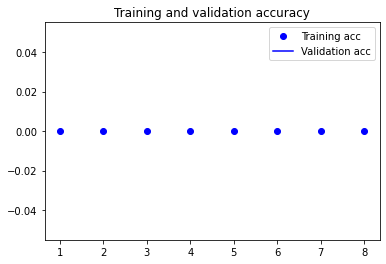

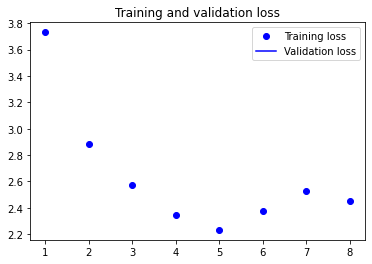

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(8,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(8,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

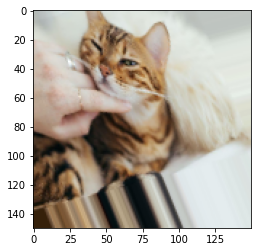

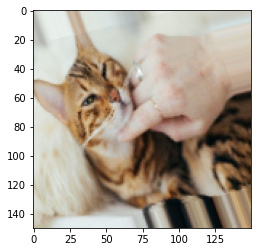

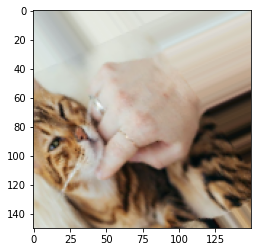

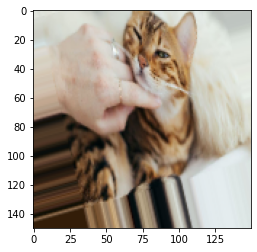

In [21]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img  = image.load_img(img_path,target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)
i = 0
for batch in datagen.flow(x,batch_size=1):
  plt.figure()
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4 == 0:
    break
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [24]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1./255)